In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# clean dataTotalNumberImage data 
dataTotalNumberImage = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/TotalNm.txt')
dataTotalNumberImage = dataTotalNumberImage.rename(columns = {'Unnamed: 0': 'Epoch'})
dataTotalNumberImage['Epoch'] = dataTotalNumberImage['Epoch'].str.extract('(\d+)')

In [ ]:
# Training 
TrainingMatrix = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/TrainingMatrix.txt')
TrainingMatrix = TrainingMatrix.rename(columns = {'PrePos_TruePos': 'TP', 'PrePos_TrueNeg': 'FP',
                      'PreNeg_TruePos': 'FN', 'PreNeg_TrueNeg': 'TN'})

TrainingMatrix['Accuracy'] = (TrainingMatrix['TP'] + TrainingMatrix['TN'])/(TrainingMatrix['TP'] + 
                                                                            TrainingMatrix['TN']+
                                                                           TrainingMatrix['FP'] + 
                                                                            TrainingMatrix['FN'])

TrainingMatrix['Precision'] = (TrainingMatrix['TP'])/(TrainingMatrix['TP'] + TrainingMatrix['FP'])

TrainingMatrix['Recall'] = (TrainingMatrix['TP'])/(TrainingMatrix['TP'] + TrainingMatrix['FN']) 

TrainingMatrix['F1'] = 2*(TrainingMatrix['Precision']*TrainingMatrix['Recall'])/(
    TrainingMatrix['Precision'] + TrainingMatrix['Recall'])

TrainingMatrix['DataSet'] = 'Training (n=65)'

TrainingMatrix = TrainingMatrix.drop(columns='Unnamed: 0')

# Testing 
TestingMatrix = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/validationMatrix.txt')
TestingMatrix = TestingMatrix.rename(columns = {'PrePos_TruePos': 'TP', 'PrePos_TrueNeg': 'FP',
                      'PreNeg_TruePos': 'FN', 'PreNeg_TrueNeg': 'TN'})

TestingMatrix['Accuracy'] = (TestingMatrix['TP'] + TestingMatrix['TN'])/(TestingMatrix['TP'] + 
                                                                            TestingMatrix['TN']+
                                                                           TestingMatrix['FP'] + 
                                                                            TestingMatrix['FN'])

TestingMatrix['Precision'] = (TestingMatrix['TP'])/(TestingMatrix['TP'] + TestingMatrix['FP'])

TestingMatrix['Recall'] = (TestingMatrix['TP'])/(TestingMatrix['TP'] + TestingMatrix['FN']) 

TestingMatrix['F1'] = 2*(TestingMatrix['Precision']*TestingMatrix['Recall'])/(
    TestingMatrix['Precision'] + TestingMatrix['Recall'])

TestingMatrix['DataSet'] = 'Testing (n=17)'

TestingMatrix = TestingMatrix.drop(columns='Unnamed: 0')
TestingMatrix.sort_values(by=['Epoch'])

Matrix = pd.concat([TrainingMatrix, TestingMatrix])

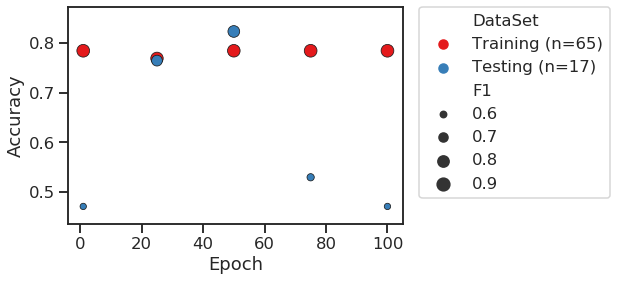

In [34]:
# plotting 

# Epoch vs. Accuracy / F1
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g= sns.scatterplot(data = Matrix, 
               x="Epoch", y= "Accuracy", edgecolor="0.1", hue = 'DataSet', palette = 'Set1', size = 'Precision')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

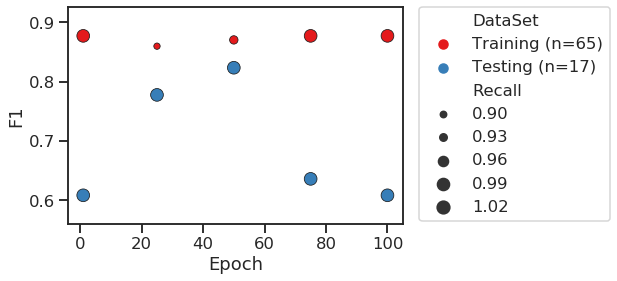

In [35]:
# Epoch vs. Recall / F1
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g= sns.scatterplot(data = Matrix, 
               x="Epoch", y= "F1", edgecolor="0.1", hue = 'DataSet', palette = 'Set1', size = 'Recall')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

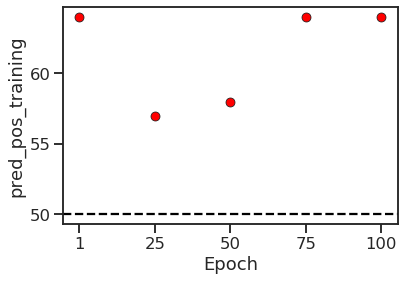

In [58]:
# Total plot (training)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")

g= sns.scatterplot(data = dataTotalNumberImage, 
               x="Epoch", y= "pred_pos_training", edgecolor="0.1", color= 'red')
g.axhline(50, ls='--', color = 'black')

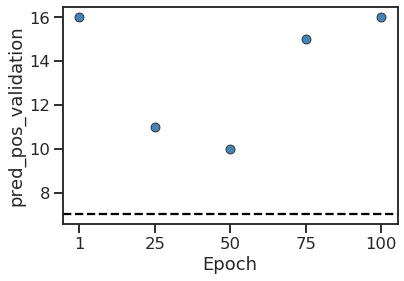

In [60]:
# Total plot (testing)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")

g= sns.scatterplot(data = dataTotalNumberImage, 
               x="Epoch", y= "pred_pos_validation", edgecolor="0.1", color = 'steelblue')
g.axhline(7, ls='--', color = 'black')

Text(0.5, 0.98, 'Training (Epoch = 50)')

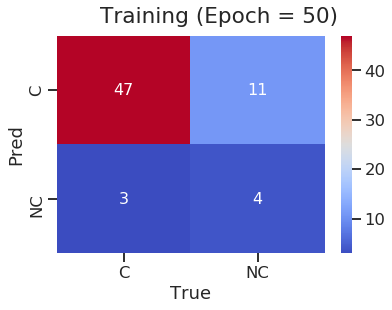

In [118]:
# ConfusionMatrix, At Epoch50, Training 

TrainingMatrix = TrainingMatrix.sort_values(by=['Epoch'])
TP = TrainingMatrix.iloc[2, 1]
FP = TrainingMatrix.iloc[2, 2]
FN = TrainingMatrix.iloc[2, 3]
TN = TrainingMatrix.iloc[2, 4]
TrainingMatrixConfusion = [[TP, FP], [FN, TN]]

g = sns.heatmap(TrainingMatrixConfusion, annot=True, annot_kws={"size": 16},cmap='coolwarm', 
               xticklabels=['C', 'NC'],
               yticklabels=['C', 'NC'])
plt.xlabel('True')
plt.ylabel('Pred')
plt.suptitle('Training (Epoch = 50)')

Text(0.5, 0.98, 'Testing (Epoch = 50)')

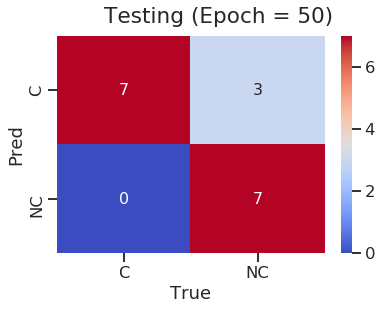

In [122]:
# ConfusionMatrix, At Epoch50, Testing 

TestingMatrix = TestingMatrix.sort_values(by=['Epoch'])
TP = TestingMatrix.iloc[2, 1]
FP = TestingMatrix.iloc[2, 2]
FN = TestingMatrix.iloc[2, 3]
TN = TestingMatrix.iloc[2, 4]
TestingMatrixMatrixConfusion = [[TP, FP], [FN, TN]]

g = sns.heatmap(TestingMatrixMatrixConfusion, annot=True, annot_kws={"size": 16},cmap='coolwarm', 
               xticklabels=['C', 'NC'],
               yticklabels=['C', 'NC'])
plt.xlabel('True')
plt.ylabel('Pred')
plt.suptitle('Testing (Epoch = 50)')